In [2]:
import os
import IPython.display
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis
The recording file for each mechanical equipment contains a total of 8 channels, one for each microphone used to record sound. The rest of this experiment focuses on what was recorded with the first microphone. Let"s do an EDA by selecting a pair of normal and abnormal 10-second sound wave files.

In [4]:
NORMAL_SOUND_PATH = "/Users/aminshafiq/Documents/Python Projects/Comparison of MFCC VS Mel-Spectrogram Features in Faulty Pump Sounds Detection/Dataset/id_00/normal/00000000.wav"
ABNORMAL_SOUND_PATH = "/Users/aminshafiq/Documents/Python Projects/Comparison of MFCC VS Mel-Spectrogram Features in Faulty Pump Sounds Detection/Dataset/id_00/abnormal/00000000.wav"
IMAGE_PATH = "/Users/aminshafiq/Documents/Python Projects/Comparison of MFCC VS Mel-Spectrogram Features in Faulty Pump Sounds Detection/Images"

In [5]:
def load_sound_file(path, mono=False, channel=1):
    
    signal, sr = librosa.load(path, sr=16000, mono=mono)

    if signal.ndim < 2:
        sound_file = signal, sr
    else:
        sound_file = signal[channel, :], sr

    return sound_file

In [6]:
normal_sound, sr = load_sound_file(NORMAL_SOUND_PATH)
abnormal_sound, sr = load_sound_file(ABNORMAL_SOUND_PATH)

print(
    f"The signals have a {normal_sound.shape} shape. At {sr} Hz, these are {normal_sound.shape[0] / sr:.0f}s signals."
)

The signals have a (160000,) shape. At 16000 Hz, these are 10s signals.


In [8]:
IPython.display.Audio(normal_sound, rate=sr)

In [9]:
IPython.display.Audio(abnormal_sound, rate=sr)

### Wave Forms

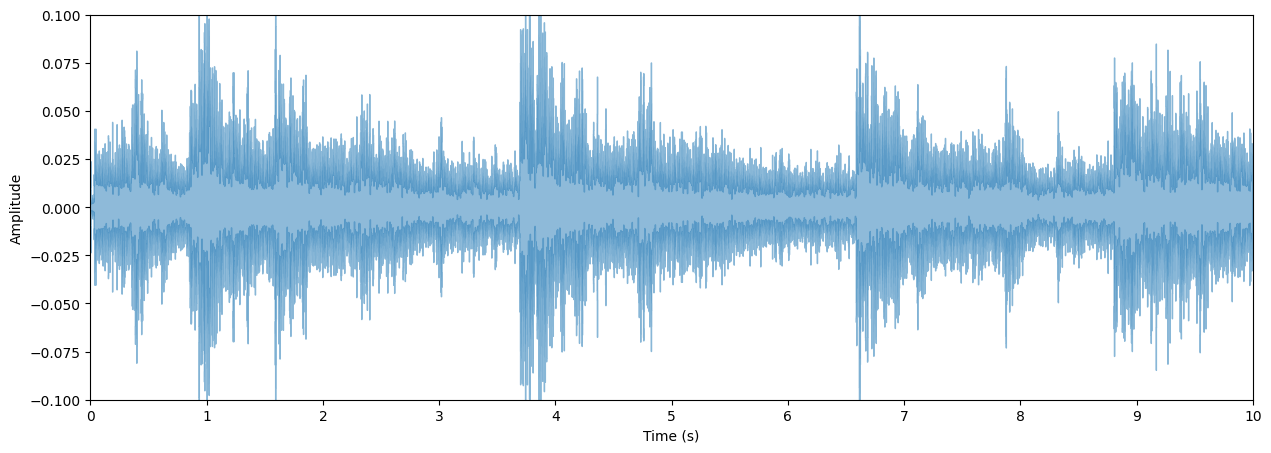

In [66]:
fig = plt.figure(figsize=(15, 17))
plt.subplot(3, 1, 1)

librosa.display.waveshow(abnormal_sound, sr=sr, color='#1f77b4', alpha=0.5)
plt.ylim(-0.1, 0.1)
plt.xlim((0, 10))
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()


In [42]:
import numpy as np

# Example: normalized audio data
audio_data = normal_sound  # Replace with your actual audio data

# Ensure no zero amplitude values to avoid log(0)
audio_data_nonzero = np.where(audio_data == 0, np.finfo(float).eps, audio_data)

# Convert to decibels
audio_data_db = 20 * np.log10(np.abs(audio_data_nonzero))

print(audio_data_db)


[-45.854668 -41.7463   -39.912437 ... -47.511414 -46.502365 -47.386436]


### Fast Fourier Tranform

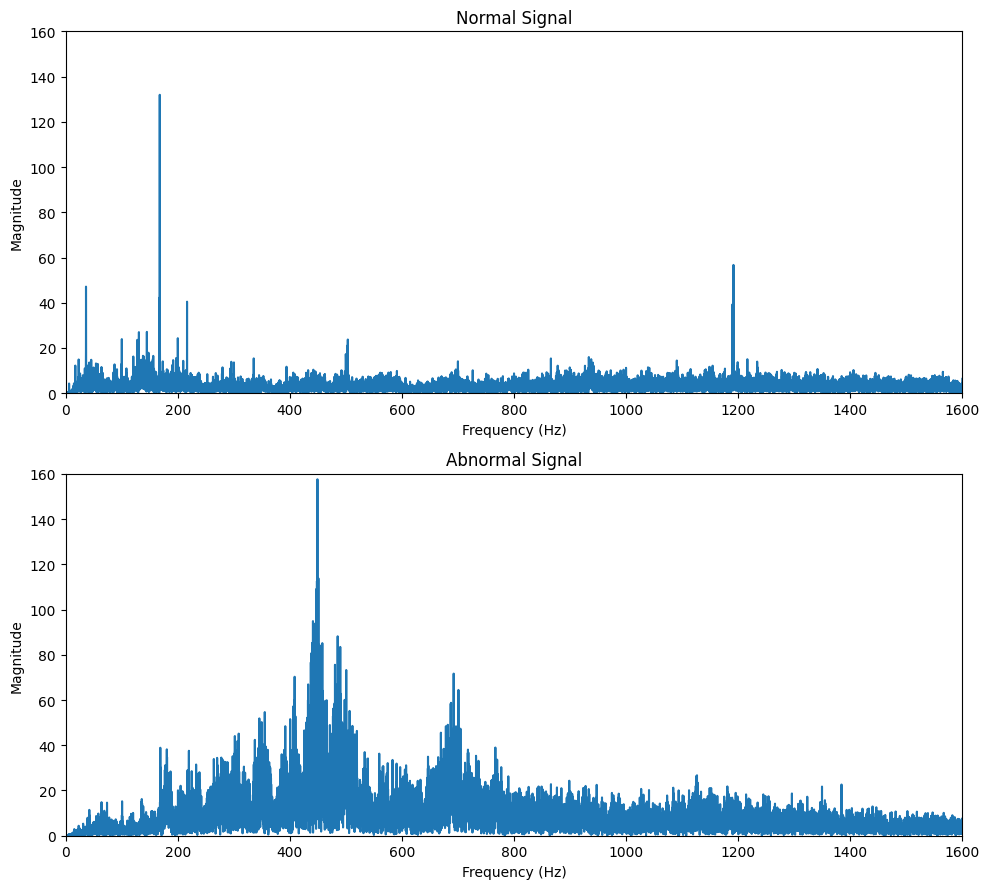

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

# Your parameters like sr, normal_sound, abnormal_sound, etc.
# sr, normal_sound, abnormal_sound, ...

fig, axs = plt.subplots(2, 1, figsize=(10, 9))  # Adjust the figsize parameter as needed

def plot_magnitude_spectrum(signal, title, sr, ax, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)

    # Compute frequency axis
    frequency = np.linspace(0, sr, len(magnitude_spectrum))
    num_frequency_bins = int(len(frequency) * f_ratio)

    # Plot magnitude spectrum on the provided axis object
    ax.plot(frequency[:num_frequency_bins], magnitude_spectrum[:num_frequency_bins])
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Magnitude")
    ax.set_title(title)
    ax.set_xlim(0, 1600)
    ax.set_ylim(0, 160)

# Plot for the normal signal
plot_magnitude_spectrum(normal_sound, "Normal Signal", sr, axs[0], 0.1)

plot_magnitude_spectrum(abnormal_sound, "Abnormal Signal", sr, axs[1], 0.1)
plt.tight_layout()
plt.show()


### Mel Spectrograms (dB scale)

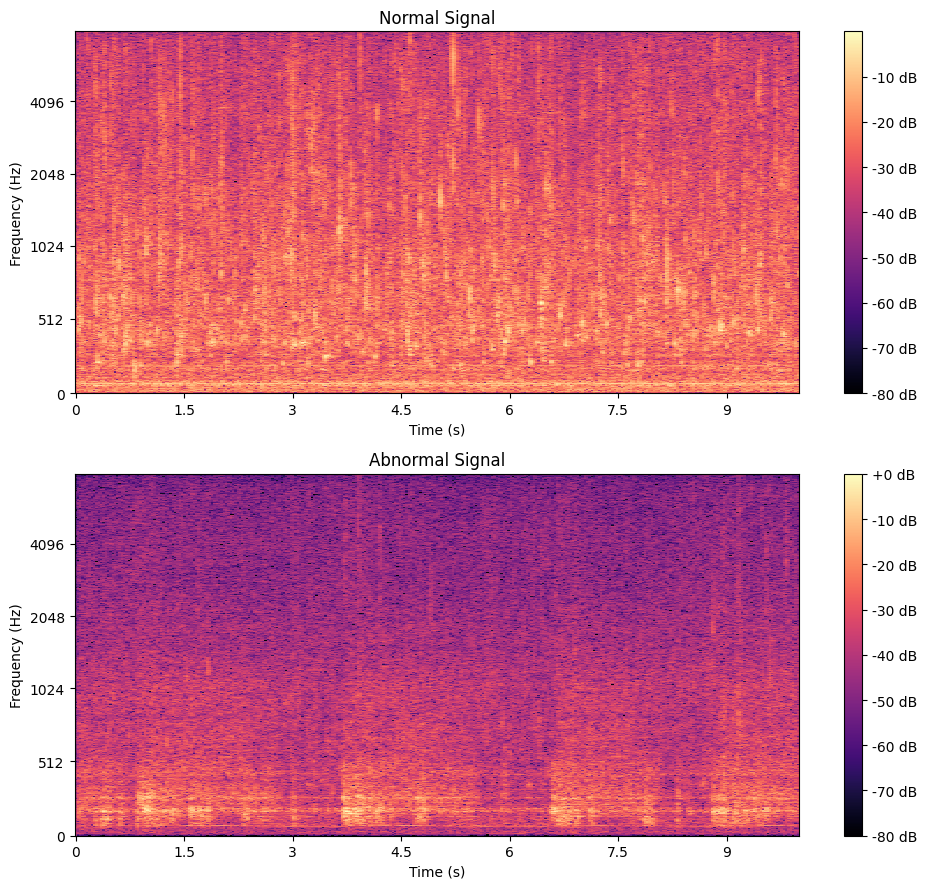

In [10]:
hop_length = 512
n_fft = 2048

normal_stft = np.abs(librosa.stft(normal_sound, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(
    librosa.stft(abnormal_sound, n_fft=n_fft, hop_length=hop_length)
)
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)

# ... [previous code, including the imports, parameter settings, and STFT calculations] ...

fig, axs = plt.subplots(2, 1, figsize=(10, 9))  # Adjust figure size as needed

# Plot for the normal signal
img1 = librosa.display.specshow(
    normal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="magma", ax=axs[0]
)
axs[0].set_title("Normal Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
fig.colorbar(img1, ax=axs[0], format="%+2.f dB")

# Plot for the abnormal signal
img2 = librosa.display.specshow(
    abnormal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="magma", ax=axs[1]
)
axs[1].set_title("Abnormal Signal")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Frequency (Hz)")
fig.colorbar(img2, ax=axs[1], format="%+2.f dB")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



In [ ]:
hop_length = 512
n_fft = 2048

normal_stft = np.abs(librosa.stft(normal_sound, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(
    librosa.stft(abnormal_sound, n_fft=n_fft, hop_length=hop_length)
)
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)

plt.figure(figsize=(15, 17))  # Adjust figure size as needed

# Plot for the normal signal
img1 = librosa.display.specshow(normal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="magma", ax=axs[0])
axs[0].set_title("Normal Signal")
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Frequency (Hz)")
fig.colorbar(img1, ax=axs[0], format="%+2.f dB")

# Plot for the abnormal signal
img2 = librosa.display.specshow(
    abnormal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="magma", ax=axs[1]
)
axs[1].set_title("Abnormal Signal")
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Frequency (Hz)")
fig.colorbar(img2, ax=axs[1], format="%+2.f dB")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

AttributeError: 'QuadMesh' object has no attribute 'title'

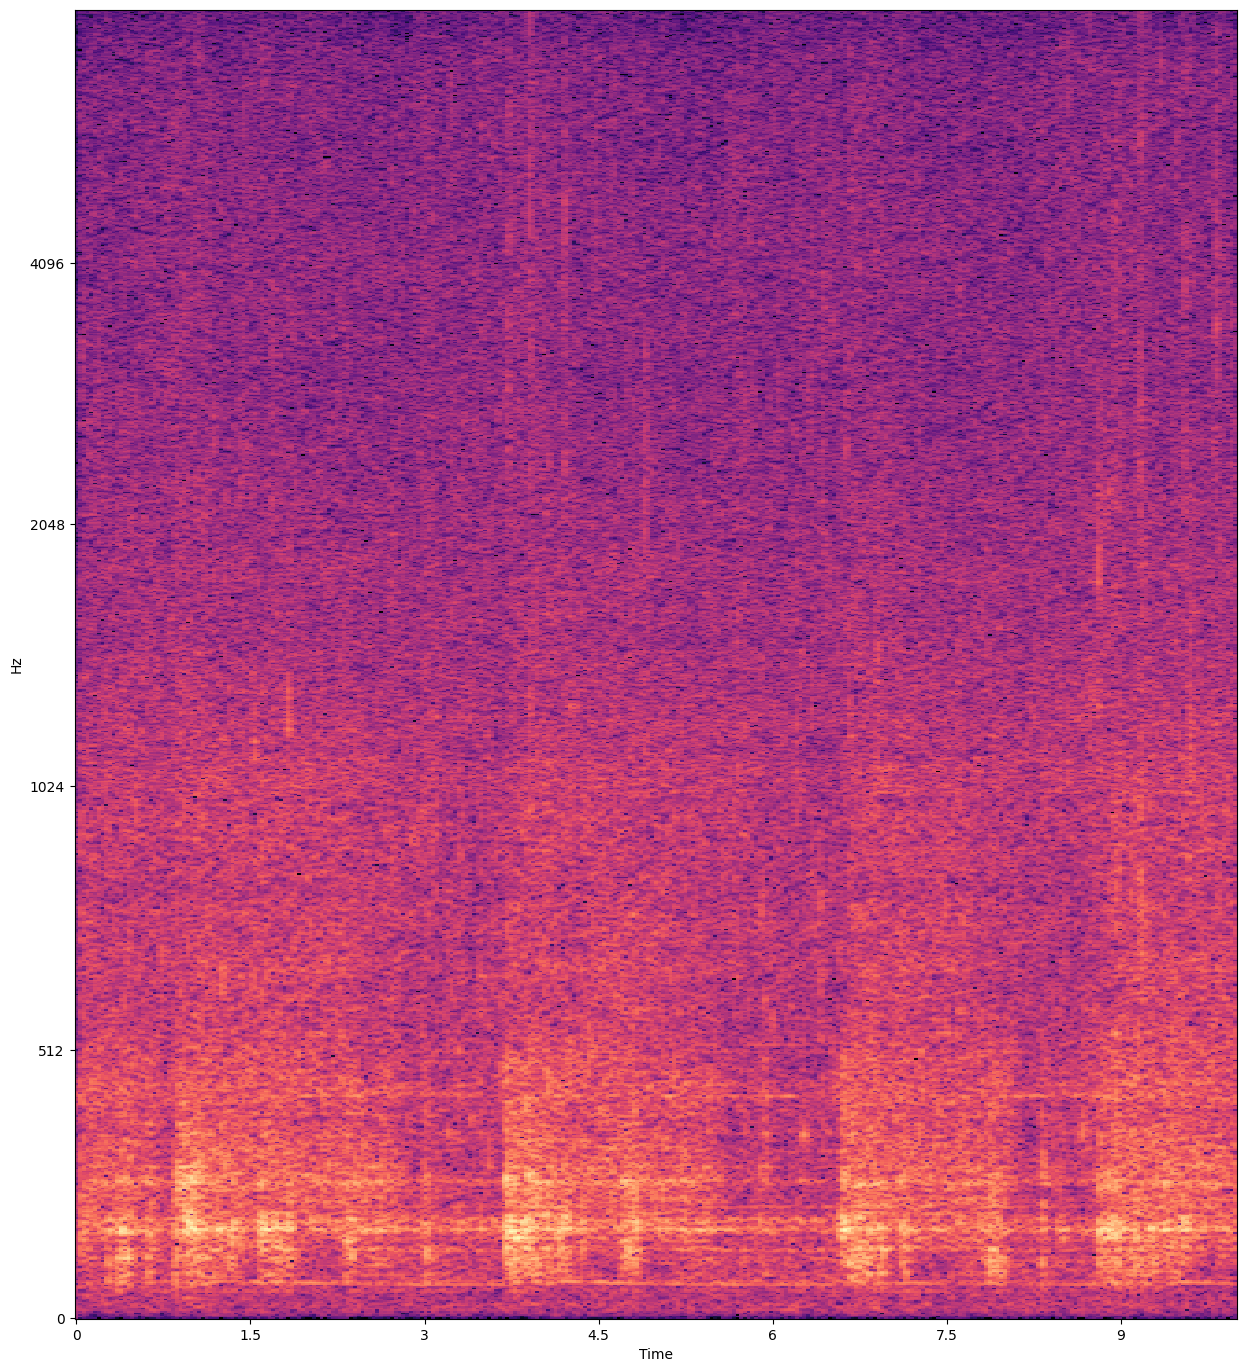

In [113]:
hop_length = 512
n_fft = 2048

normal_stft = np.abs(librosa.stft(normal_sound, n_fft=n_fft, hop_length=hop_length))
normal_spectrogram = librosa.amplitude_to_db(normal_stft, ref=np.max)
abnormal_stft = np.abs(
    librosa.stft(abnormal_sound, n_fft=n_fft, hop_length=hop_length)
)
abnormal_spectrogram = librosa.amplitude_to_db(abnormal_stft, ref=np.max)

plt.figure(figsize=(15, 17))  # Adjust figure size as needed

# Plot for the abnormal signal
img2 = librosa.display.specshow(abnormal_spectrogram, sr=sr, x_axis="time", y_axis="mel", cmap="magma")
img2.title("Abnormal Signal")
img2.xlabel("Time (s)")
img2.ylabel("Frequency (Hz)")
fig.colorbar(img2, format="%+2.f dB")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



### MFCC

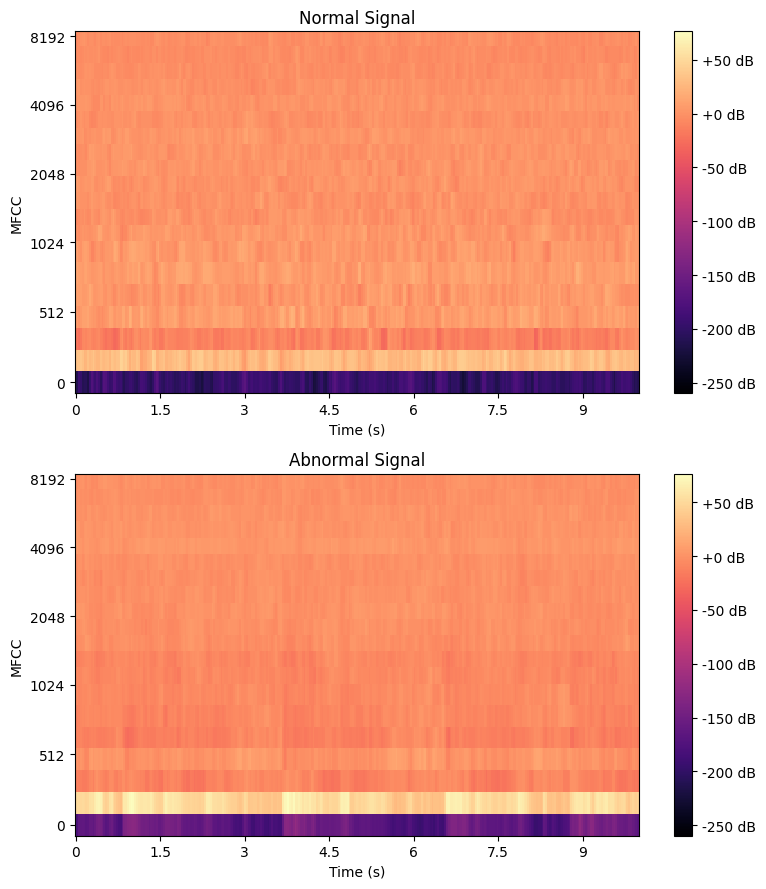

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

n_mels = 64
n_mfcc = 20  # Number of MFCCs to extract

# Compute MFCC for normal sound
normal_mfcc = librosa.feature.mfcc(
    y=normal_sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, n_mfcc=n_mfcc
)

# Compute MFCC for abnormal sound
abnormal_mfcc = librosa.feature.mfcc(
    y=abnormal_sound, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, n_mfcc=n_mfcc
)

# Determine the min and max values for the color scale across both MFCCs
mfcc_min = min(normal_mfcc.min(), abnormal_mfcc.min())
mfcc_max = max(normal_mfcc.max(), abnormal_mfcc.max())

# Plotting the MFCCs
fig, ax = plt.subplots(2, 1, figsize=(8, 9))  # Adjusted for 2 rows, 1 column

# Normal Sound MFCC
img_normal = librosa.display.specshow(
    normal_mfcc,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap='magma',
    ax=ax[0],  # Use first subplot for normal sound
    vmin=mfcc_min,  # Set min value for color scale
    vmax=mfcc_max   # Set max value for color scale
)
ax[0].set_title("Normal Signal")
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("MFCC")
fig.colorbar(img_normal, ax=ax[0], format="%+2.0f dB")

# Abnormal Sound MFCC
img_abnormal = librosa.display.specshow(
    abnormal_mfcc,
    sr=sr,
    hop_length=hop_length,
    x_axis="time",
    y_axis="mel",
    cmap='magma',
    ax=ax[1],  # Use second subplot for abnormal sound
    vmin=mfcc_min,  # Use the same min value for color scale
    vmax=mfcc_max   # Use the same max value for color scale
)
ax[1].set_title("Abnormal Signal")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("MFCC")
fig.colorbar(img_abnormal, ax=ax[1], format="%+2.0f dB")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
